In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric

In [2]:
df = pd.read_csv('/Users/yuliz/Downloads/vertebral_column_data/column_2C.dat', sep='\s+', 
                 names=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 
                         'pelvic_radius', 'grade_of_spondylolisthesis','class_label'])

In [3]:
df.loc[df['class_label'] == 'NO', 'class_label'] = 0
df.loc[df['class_label'] == 'AB', 'class_label'] = 1
df.loc[df['class_label'] == 'DH', 'class_label'] = 2
df.loc[df['class_label'] == 'SL', 'class_label'] = 3
df = df.drop(df[df['class_label']>1].index)
df.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


(310, 7)

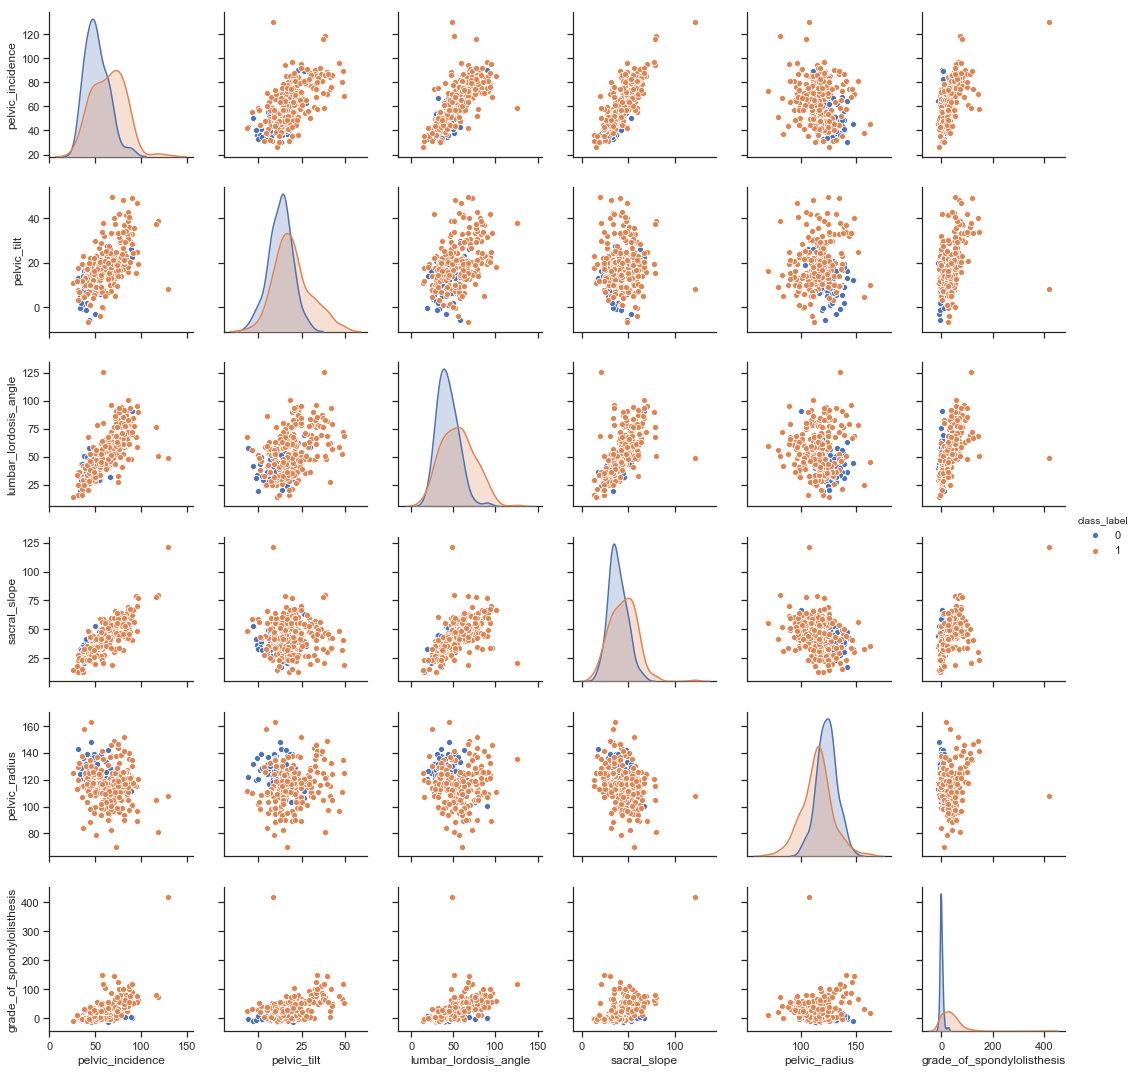

In [4]:
g = sns.pairplot(df, hue="class_label",vars=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 
                         'pelvic_radius', 'grade_of_spondylolisthesis'])

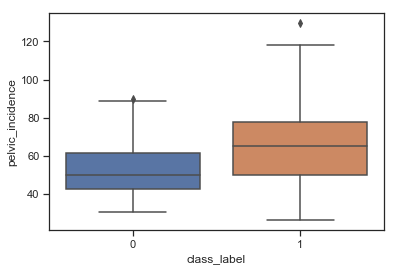

In [5]:
ax = sns.boxplot(y=df['pelvic_incidence'], x=df["class_label"])

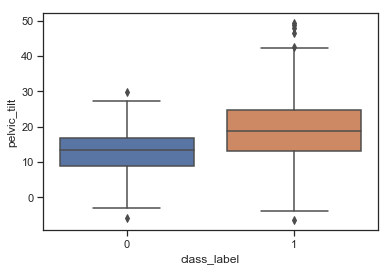

In [6]:
ax = sns.boxplot(y=df['pelvic_tilt'], x=df["class_label"])

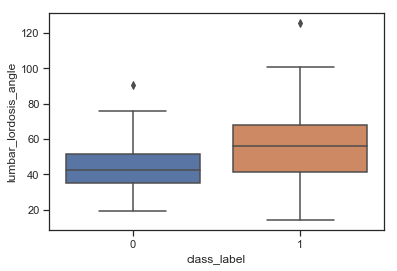

In [7]:
ax = sns.boxplot(y=df['lumbar_lordosis_angle'], x=df["class_label"])

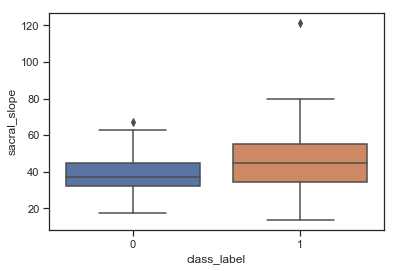

In [8]:
ax = sns.boxplot(y=df['sacral_slope'], x=df["class_label"])

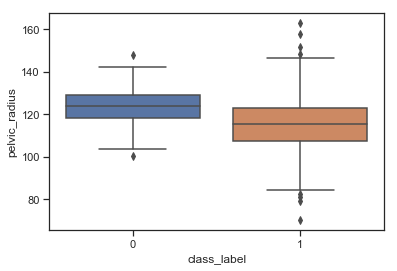

In [9]:
ax = sns.boxplot(y=df['pelvic_radius'], x=df["class_label"]) 

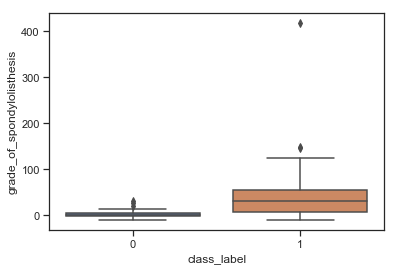

In [10]:
ax = sns.boxplot(y=df['grade_of_spondylolisthesis'], x=df["class_label"])

In [11]:
df_0 = df[df['class_label'] == 0]
df_1 = df[df['class_label'] == 1]

In [12]:
frames = [df_0.iloc[:70,], df_1.iloc[:140,]]
df_train = pd.concat(frames) #commine two sub dataframes
X_train = df_train.drop(columns=['class_label'])
y_train = df_train['class_label']

In [13]:
frames = [df_0.iloc[70:,], df_1.iloc[140:,]]
df_test = pd.concat(frames) #commine two sub dataframes
X_test = df_test.drop(columns=['class_label'])
y_test = df_test['class_label']

In [14]:
all_train_errors = [] #list for all train errors
dict_k_train = {}
dict_k_test = {}
for k in range(208,0,-3):
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_train, y_train)
    pred_test = knn.predict(X_test)
    pred_train = knn.predict(X_train)
    dict_k_train[k] = 1-accuracy_score(y_train,pred_train)
    dict_k_test[k] = 1-accuracy_score(y_test,pred_test)
    all_train_errors.append(1-accuracy_score(y_train,pred_train))
k_optim = min(dict_k_test, key=dict_k_test.get)

In [15]:
print("K for lowest test error: ", k_optim)

K for lowest test error:  4


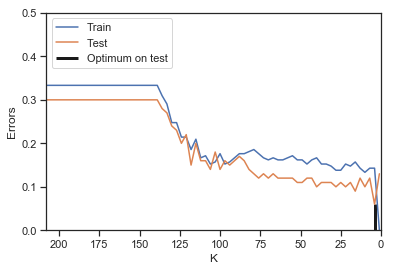

In [16]:
train_k_errors = dict_k_train.values()
test_k_errors = dict_k_test.values()
k_list = dict_k_train.keys()
plt.plot(k_list, train_k_errors, label='Train')
plt.plot(k_list, test_k_errors, label='Test')
plt.vlines(k_optim, plt.ylim()[0], min(test_k_errors), color='k',linewidth=3, label='Optimum on test')
plt.legend(loc='upper left')
plt.ylim([0, 0.5])
plt.xlim([208, 0])
plt.xlabel('K')
plt.ylabel('Errors')
plt.show()

In [17]:
knn = KNeighborsClassifier(n_neighbors=k_optim,metric='euclidean')
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print("Confusion Matrix:")
df_confusion_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0','1']])
print(df_confusion_matrix)

Confusion Matrix:
         predicted    
                 0   1
actual 0        25   5
       1         1  69


In [18]:
tpr = confusion_matrix(y_test, pred)[1,1]/(confusion_matrix(y_test, pred)[1,1]+confusion_matrix(y_test, pred)[1,0])
print('True positive rate: ', tpr)

True positive rate:  0.9857142857142858


In [19]:
tnr = confusion_matrix(y_test, pred)[0,0]/(confusion_matrix(y_test, pred)[0,0]+confusion_matrix(y_test, pred)[0,1])
print('True negative rate: ', tnr)

True negative rate:  0.8333333333333334


In [20]:
print('Precision: ',precision_score(y_test,pred))

Precision:  0.9324324324324325


In [21]:
print('F Score: ',f1_score(y_test, pred))

F Score:  0.9583333333333333


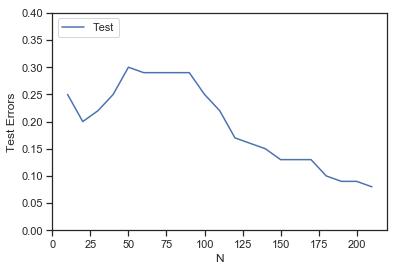

In [22]:
dict_N_test = {}
for N in range(10,211,10):
    df_train_0 = df_train[df_train['class_label'] == 0]
    df_train_1 = df_train[df_train['class_label'] == 1]
    frames = [df_train_0.iloc[:N//3,], df_train_1.iloc[:N-N//3,]]
    df_train_N = pd.concat(frames)
    X_train_euc = df_train_N.drop(columns=['class_label'])
    y_train_euc = df_train_N['class_label']

    dict_k_test = {}
    for k in range(1,N+1,5):
        knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
        knn.fit(X_train_euc, y_train_euc)
        pred_test = knn.predict(X_test)
        pred_train = knn.predict(X_train_euc)
        dict_k_test[k] = 1-accuracy_score(y_test,pred_test)
        all_train_errors.append(1-accuracy_score(y_train_euc,pred_train))
    k_optim = min(dict_k_test, key=dict_k_test.get)
    dict_N_test[N] = dict_k_test[k_optim]
    
test_errors = dict_N_test.values()
N_list = dict_N_test.keys()
plt.plot(N_list, test_errors, label='Test')
plt.legend(loc='upper left')
plt.ylim([0, 0.4])
plt.xlim([0, 220])
plt.xlabel('N')
plt.ylabel('Test Errors')
plt.show()
    

In [23]:
cov_X = np.cov(X_train)
if np.linalg.det(cov_X) == 0:
    print("Singular cov matrix. Use pseudo inverse for mahalanobis distance instead")
    pseudoI_X = np.linalg.pinv(cov_X)

Singular cov matrix. Use pseudo inverse for mahalanobis distance instead


In [24]:
manhattan_test = {}
chebyshev_test = {}
mahalanobis_test = {}
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    knn.fit(X_train, y_train)
    pred_test = knn.predict(X_test)
    pred_train = knn.predict(X_train)
    manhattan_test[k] = 1-accuracy_score(y_test,pred_test)
    all_train_errors.append(1-accuracy_score(y_train,pred_train))
    
    knn = KNeighborsClassifier(n_neighbors=k,metric='chebyshev')
    knn.fit(X_train, y_train)
    pred_test = knn.predict(X_test)
    pred_train = knn.predict(X_train)
    chebyshev_test[k] = 1-accuracy_score(y_test,pred_test)
    all_train_errors.append(1-accuracy_score(y_train,pred_train))
    
    #DistanceMetric.get_metric('mahalanobis', VI=pseudoI_X)
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute',metric='mahalanobis',metric_params={'VI': pseudoI_X})
    knn.fit(X_train, y_train)
    pred_test = knn.predict(X_test)
    pred_train = knn.predict(X_train)
    mahalanobis_test[k] = 1-accuracy_score(y_test,pred_test)
    all_train_errors.append(1-accuracy_score(y_train,pred_train))
k_optim_manhattan = min(manhattan_test, key=manhattan_test.get)
k_optim_chebyshev = min(chebyshev_test, key=chebyshev_test.get)
k_optim_mahalanobis = min(mahalanobis_test, key=mahalanobis_test.get)

In [25]:
k = list(manhattan_test.keys())
list_distances = []
list_distances.append(list(manhattan_test.values()))
list_distances.append(list(chebyshev_test.values()))
list_distances.append(list(mahalanobis_test.values()))
df_k = pd.DataFrame(list_distances, columns = k, index=['manhattan', 'chebyshev','mahalanobis']) 
df_k

,1,6,11,16,21,26,31,36,41,46,...,151,156,161,166,171,176,181,186,191,196
manhattan,0.12,0.11,0.11,0.12,0.12,0.11,0.12,0.13,0.13,0.13,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
chebyshev,0.13,0.10,0.12,0.08,0.11,0.12,0.12,0.10,0.13,0.12,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
mahalanobis,0.29,0.25,0.22,0.30,0.26,0.25,0.22,0.23,0.23,0.21,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3


In [26]:
print('Best k for manhattan distance:',k_optim_manhattan)
print('Best k for chebyshev distance:',k_optim_chebyshev)
print('Best k for mahalanobis distance:',k_optim_mahalanobis)

Best k for manhattan distance: 6
Best k for chebyshev distance: 16
Best k for mahalanobis distance: 46


In [27]:
minkowski_test = {}
for p_log in range(1,11):
    p = 10 ** (p_log/10)
    knn = KNeighborsClassifier(n_neighbors=k_optim_manhattan, p=p,metric='minkowski')
    knn.fit(X_train, y_train)
    pred_test = knn.predict(X_test)
    pred_train = knn.predict(X_train)
    minkowski_test[p_log/10] = 1-accuracy_score(y_test,pred_test)
    all_train_errors.append(1-accuracy_score(y_train,pred_train))
p_log10_optim_minkowski = min(minkowski_test, key=minkowski_test.get)
print('Best log10(p) with minkowski k value =',k_optim_manhattan,':',p_log10_optim_minkowski)

Best log10(p) with minkowski k value = 6 : 0.6


In [28]:
manhattan_weighted = {}
chebyshev_weighted = {}
euclidean_weighted = {}
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance',metric='manhattan')
    knn.fit(X_train, y_train)
    pred_test = knn.predict(X_test)
    pred_train = knn.predict(X_train)
    manhattan_weighted[k] = 1-accuracy_score(y_test,pred_test)
    all_train_errors.append(1-accuracy_score(y_train,pred_train))
    
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance',metric='chebyshev')
    knn.fit(X_train, y_train)
    pred_test = knn.predict(X_test)
    pred_train = knn.predict(X_train)
    chebyshev_weighted[k] = 1-accuracy_score(y_test,pred_test)
    all_train_errors.append(1-accuracy_score(y_train,pred_train))

    knn = KNeighborsClassifier(n_neighbors=k,weights='distance',metric='euclidean')
    knn.fit(X_train, y_train)
    pred_test = knn.predict(X_test)
    pred_train = knn.predict(X_train)
    euclidean_weighted[k] = 1-accuracy_score(y_test,pred_test)
    all_train_errors.append(1-accuracy_score(y_train,pred_train))
k_optim_manhattan_weighted = min(manhattan_weighted, key=manhattan_weighted.get)
k_optim_chebyshev_weighted = min(chebyshev_weighted, key=chebyshev_weighted.get)
k_optim_euclidean_weighted = min(euclidean_weighted, key=euclidean_weighted.get)

In [29]:
print('Weighted manhattan distance: Best k:',k_optim_manhattan_weighted,', Best test error:',manhattan_weighted[k_optim_manhattan_weighted])
print('Weighted chebyshev distance: Best k:',k_optim_chebyshev_weighted,', Best test error:',chebyshev_weighted[k_optim_chebyshev_weighted])
print('Weighted euclidean distance: Best k:',k_optim_euclidean_weighted,', Best test error:',euclidean_weighted[k_optim_euclidean_weighted])

Weighted manhattan distance: Best k: 26 , Best test error: 0.09999999999999998
Weighted chebyshev distance: Best k: 16 , Best test error: 0.10999999999999999
Weighted euclidean distance: Best k: 6 , Best test error: 0.09999999999999998


In [30]:
print("Minimum train error: ",min(all_train_errors))

Minimum train error:  0.0
